In [ ]:
# for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import preprocessing, model_selection
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
'''
Читаем данные из файла, и сразу смотрим заголовки столбцов (название фич) и первые 5 строк.

'''

dtf = pd.read_csv('gdrive/MyDrive/Data_analysis/ПИ/Лекции/Регрессия/penguins.csv')
dtf.head()

,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [ ]:
'''
Функция подготовки датасета для дальнейшего скармливания моделям
'''

def prep(df):
    '''
    заменяем категориальные данные на числовые
    нормируем данные

    :param df: входной датасет
    :return: возвращает новый датасет, полностью готовый для обучения
    '''
    df.loc[df.species == 'Adelie', 'species_ind'] = 0
    df.loc[df.species == 'Chinstrap', 'species_ind'] = 1
    df.loc[df.species == 'Gentoo', 'species_ind'] = 2
    df.loc[df.island == 'Biscoe', 'island_ind'] = 0
    df.loc[df.island == 'Dream', 'island_ind'] = 1
    df.loc[df.island == 'Torgersen', 'island_ind'] = 2

    df.loc[df.sex == 'MALE', 'sex_g'] = 0
    df.loc[df.sex == 'FEMALE', 'sex_g'] = 1

    df.drop('Unnamed: 0', axis=1, inplace=True)
    emdf = df.dropna(axis=0, how='any', inplace=False)

    # нормируем значения
    Y = 'species_ind'

    n_df = emdf
    lbs = []

    for v in dtf.columns:
        if utils_recognize_type(dtf, v) == 'cat':
            lbs.append(v)

    n_df.drop(columns = lbs, inplace=True)

    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(n_df)

    train_emdf_scaled = pd.DataFrame(X, columns=n_df.columns,index=n_df.index )

    return  train_emdf_scaled

In [ ]:
'''
Получаем чистенький датасет
'''
scaled_dtf = prep(dtf)
scaled_dtf.head()

<ipython-input-50-2460492b9730>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df.drop(columns = lbs, inplace=True)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
4,0.167273,0.738095,0.355932,0.208333
5,0.261818,0.892857,0.305085,0.263889


In [ ]:
'''
смотрим, что в нем.

Все категориальные столбцы были удалены, даже те, которые превратили в числовые.
Если числовые категориальные столбцы нужны, то нужно изменить логику в функции utils_recognize_type

'''
scaled_dtf.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
4,0.167273,0.738095,0.355932,0.208333
5,0.261818,0.892857,0.305085,0.263889


In [ ]:
'''
Делим на трейн и тест
'''
## split data
X_train, X_test = model_selection.train_test_split(scaled_dtf, test_size=0.3)

'''
целевая переменная body_mass_g, ее записываем в отдельных датафрейм
'''
y_train = X_train['body_mass_g']
y_test = X_test['body_mass_g']

'''
удаляем целевую переменную из датафреймов X_ , в них должны остаться только нецелевые переменные
'''
X_train.drop(columns=['body_mass_g'], inplace=True)
X_test.drop(columns=['body_mass_g'], inplace=True)


In [ ]:
'''
Смотрим, что пришло
'''
X_train.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
121,0.203636,0.797619,0.440678
320,0.683636,0.571429,0.406780
332,0.476364,0.416667,0.322034
131,0.400000,0.726190,0.423729
48,0.141818,0.571429,0.305085


In [ ]:
'''
Смотрим, что пришло
'''
X_train.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
count,233.000000,233.000000,233.000000
mean,0.424362,0.474402,0.494799
std,0.194050,0.234389,0.236206
min,0.000000,0.000000,0.000000
25%,0.258182,0.261905,0.305085
50%,0.436364,0.523810,0.423729
75%,0.600000,0.654762,0.711864
max,0.836364,1.000000,0.983051


In [ ]:
'''
Смотрим, что пришло
'''
y_train.head()

121    0.222222
320    0.270833
332    0.152778
131    0.222222
48     0.208333
Name: body_mass_g, dtype: float64

In [ ]:
'''
Смотрим, что пришло
'''
y_train.describe()

count    233.000000
mean       0.423999
std        0.220532
min        0.041667
25%        0.236111
50%        0.375000
75%        0.597222
max        0.916667
Name: body_mass_g, dtype: float64

In [ ]:
'''
Теперь смотрим, что пришло в тестовых датафреймах
'''
X_test.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
54,0.087273,0.595238,0.254237
1,0.269091,0.511905,0.237288
307,0.803636,0.916667,0.491525
339,0.861818,0.797619,0.593220
249,0.538182,0.178571,0.847458


In [ ]:
'''
Теперь смотрим, что пришло в тестовых датафреймах
'''

X_test.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
count,100.000000,100.000000,100.000000
mean,0.451345,0.506071,0.482034
std,0.209427,0.234206,0.241630
min,0.069091,0.011905,0.101695
25%,0.274545,0.366071,0.305085
50%,0.476364,0.500000,0.423729
75%,0.599091,0.690476,0.644068
max,1.000000,0.964286,1.000000


In [ ]:
'''
Теперь смотрим, что пришло в тестовых датафреймах
'''

y_test.head()

54     0.055556
1      0.305556
307    0.444444
339    0.361111
249    0.604167
Name: body_mass_g, dtype: float64

In [ ]:
'''
Теперь смотрим, что пришло в тестовых датафреймах
'''

y_test.describe()

count    100.000000
mean       0.406111
std        0.231464
min        0.000000
25%        0.239583
50%        0.354167
75%        0.550347
max        1.000000
Name: body_mass_g, dtype: float64

<Figure size 2000x2000 with 0 Axes>

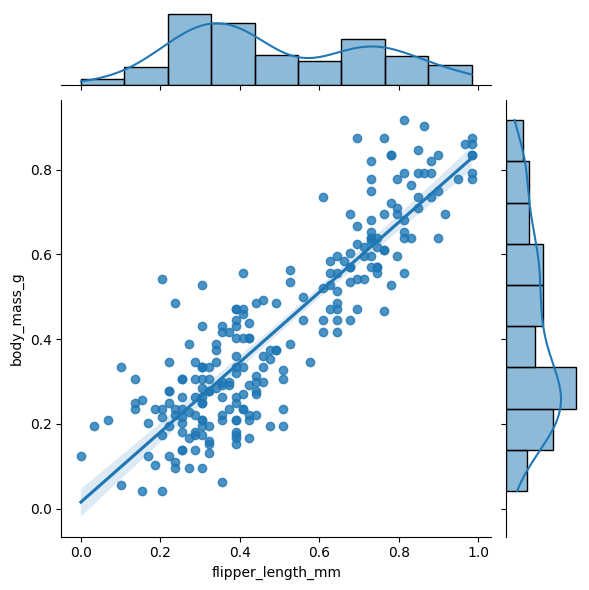

In [ ]:
'''
Здесь и далее - рисуем красивые картинки - диаграммки рассеяния с возможной линией - функцией простой линейной регрессии
А сверху и справа - гистограмма распределения с огибающей линией
'''

fig = plt.figure(figsize=(20, 20))
axes = sns.jointplot(
    x=X_train['flipper_length_mm'], y=y_train,
    kind='reg',
    ci=95)
plt.show()

<Figure size 2000x2000 with 0 Axes>

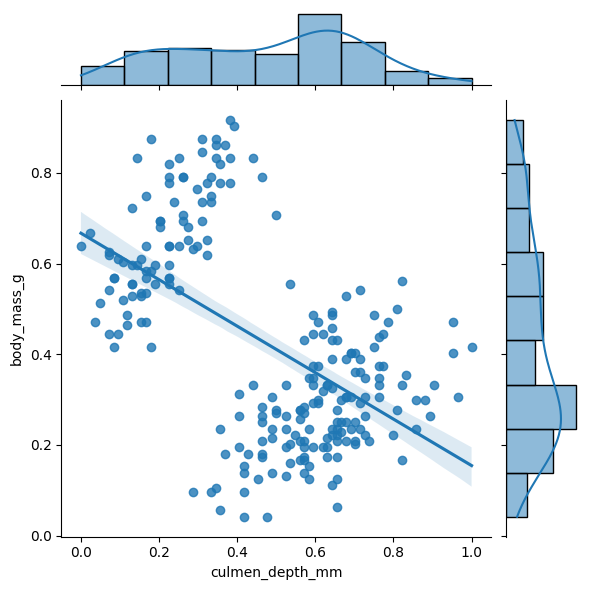

In [ ]:
fig = plt.figure(figsize=(20, 20))
axes = sns.jointplot(
    x=X_train['culmen_depth_mm'], y=y_train,
    kind='reg',
    ci=95)
plt.show()

<Figure size 2000x2000 with 0 Axes>

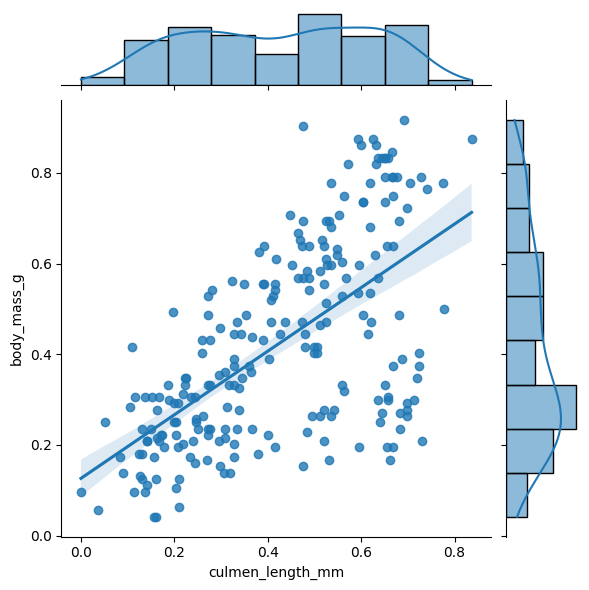

In [ ]:
fig = plt.figure(figsize=(20, 20))
axes = sns.jointplot(
    x=X_train['culmen_length_mm'], y=y_train,
    kind='reg',
    ci=95)
plt.show()

In [ ]:
'''
Тут лежат алгоритмы линейной регрессии
'''
from sklearn.linear_model import LinearRegression

'''
Создаем и обучаем линейную регрессию
'''
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
'''
Смотрим весовые коэффициенты линейной регрессии, которые мы в результате получили
'''
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
culmen_length_mm,0.041388
culmen_depth_mm,0.003622
flipper_length_mm,0.804121


In [ ]:
'''
Делаем предсказания на тестовом датафрейме
'''
y_pred = regressor.predict(X_test)
y_pred

array([0.2170441 , 0.21063821, 0.43866574, 0.5224176 , 0.71121817,
       0.28063238, 0.80757332, 0.14245091, 0.63325051, 0.26522251,
       0.36840909, 0.51370059, 0.46018217, 0.28884346, 0.32971464,
       0.27465769, 0.69666484, 0.19303087, 0.14681381, 0.30647277,
       0.36649714, 0.21887043, 0.18860204, 0.41718678, 0.5579741 ,
       0.38637667, 0.53606059, 0.55543502, 0.24288825, 0.59371752,
       0.18613371, 0.53981917, 0.14021284, 0.57567898, 0.17050781,
       0.68615227, 0.23636955, 0.45816137, 0.51479807, 0.30830162,
       0.28921521, 0.3236106 , 0.80204784, 0.35213408, 0.61482556,
       0.31533044, 0.30316402, 0.71476765, 0.25917791, 0.55948959,
       0.26371748, 0.13101502, 0.49073042, 0.25859788, 0.23944637,
       0.80002705, 0.22873934, 0.54949529, 0.41856015, 0.38146032,
       0.69997674, 0.22949101, 0.15861581, 0.40032944, 0.30320546,
       0.21921456, 0.55294158, 0.35578759, 0.70130928, 0.515614  ,
       0.65777699, 0.11188298, 0.19681709, 0.4336755 , 0.38293

In [ ]:
'''
Выводим рядышком - реальное значение целевой переменной (Actual) и предсказанное (Predicted)
'''

p_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
p_df

,Actual,Predicted
54,0.055556,0.217044
1,0.305556,0.210638
307,0.444444,0.438666
339,0.361111,0.522418
249,0.604167,0.711218
...,...,...
140,0.194444,0.306967
201,0.722222,0.613773
185,0.930556,0.840400
263,0.902778,0.811548


In [ ]:
'''
вот тут лежат все метрики
'''
from sklearn import metrics


'''
Смотрим метрики - ошибку между реальным и предсказанным значением
'''

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


'''
По самим метрикам ничего сказать нельзя- надо смотреть на средние и медианные значения целевой переменной. И прикинуть, на сколько процентов ошибается наша модель.
В нашем случае - около 30%
'''

Mean Absolute Error: 0.09860937956326915
Mean Squared Error: 0.014724228191871507
Root Mean Squared Error: 0.12134343077345187


'\nПо самим метрикам ничего сказать нельзя- надо смотреть на средние и медианные значения целевой переменной. И прикинуть, на сколько процентов ошибается наша модель.\nВ нашем случае - около 30%\n'

In [ ]:
'''
R2 метрика, коэффициент  детерминации, показывающий насколько расчетные параметры модели объясняют зависимость и изменения целевой переменной Y от нецелевых фич - X.

Можно сказать что, это показатель качества модели и чем он выше тем лучше.
Понятное дело, что он не может быть больше 1 и считается неплохо, когда R2 выше 0,8, а если меньше 0,5, то смысл такой модели можно смело ставить под большой вопрос.


У нас тут все пойдет с пивом
'''
from sklearn.metrics import r2_score

print('R2 =', r2_score(p_df['Actual'],p_df['Predicted']))

R2 = 0.7223919089042088


In [ ]:
'''
Теперь обернем все обучение простой регрессии в функцию
'''
import statsmodels.api as sm

def  simple_linear_regression(X_train, y_train, X_test, y_test, column_name):
   '''

   :param X_train:
   :param y_train:
   :param X_test:
   :param y_test:
   :param column_name:
   :return:
   '''

   '''
   Переформируем датасеты для OLS из statsmodels
   '''
   X = X_train[[column_name]]
   y = y_train

   '''
   Обучаем модель
   https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
   '''
   model = sm.OLS(y, X)
   results = model.fit()

   results.summary()
   '''
   Подготавливаем рисунок
   '''
   fig, ax = plt.subplots()
   fig = sm.graphics.plot_fit(results, 0, ax=ax)
   ax.set_ylabel("body_mass_g")
   ax.set_xlabel(column_name)
   ax.set_title("Linear Regression")

   '''
   Считаем R2
   '''
   print('R2 =', results.rsquared)

   '''
   Выводим метрики
   '''
   res = regression_model_adequacy_check(results, p_level=0.95, model_name='linear_ols')
   print(res)




R2 = 0.9532242404901671
                  SST       SSE  dfT  dfE       MST       MSE  p_level  \
linear_ols  11.283192  2.487101  232  231  0.048634  0.010767     0.95   

            a_level   F_calc   F_table  F_calc >= F_table        a_calc  \
linear_ols     0.05  4.51713  1.241956               True  1.110223e-16   

            a_calc <= a_level adequacy_check  
linear_ols               True       adequacy  


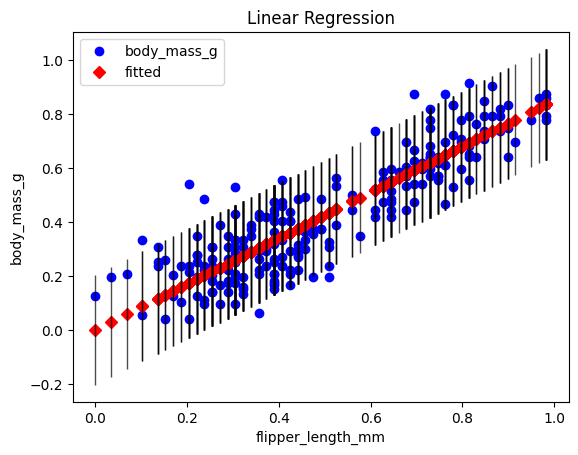

In [ ]:
'''
Запускаем для разных столбцов
'''
simple_linear_regression(X_train, y_train, X_test, y_test, 'flipper_length_mm' )

R2 = 0.8565781862639616
                  SST       SSE  dfT  dfE       MST       MSE  p_level  \
linear_ols  11.283192  7.625841  232  231  0.048634  0.033012     0.95   

            a_level    F_calc   F_table  F_calc >= F_table    a_calc  \
linear_ols     0.05  1.473222  1.241956               True  0.001669   

            a_calc <= a_level adequacy_check  
linear_ols               True       adequacy  


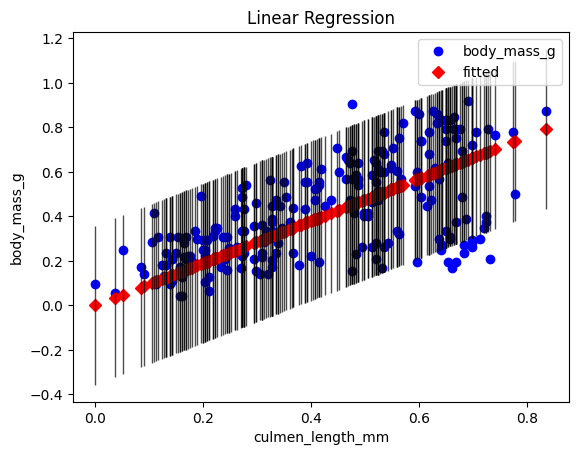

In [ ]:
simple_linear_regression(X_train, y_train, X_test, y_test, 'culmen_length_mm' )

R2 = 0.4693763100694083
                  SST        SSE  dfT  dfE       MST       MSE  p_level  \
linear_ols  11.283192  28.213642  232  231  0.048634  0.122137     0.95   

            a_level    F_calc   F_table  F_calc >= F_table  a_calc  \
linear_ols     0.05  0.398196  1.241956              False     1.0   

            a_calc <= a_level adequacy_check  
linear_ols              False   non adequacy  


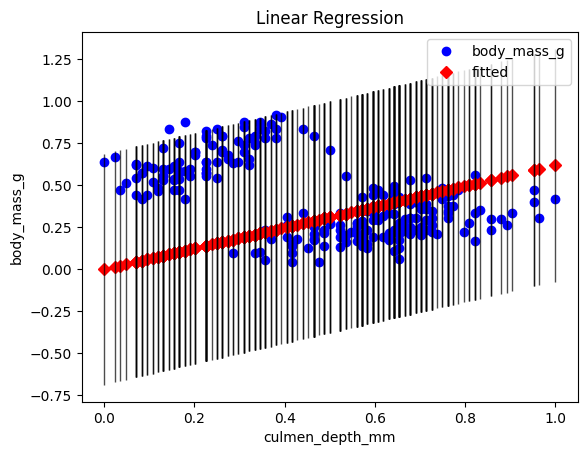

In [ ]:
simple_linear_regression(X_train, y_train, X_test, y_test, 'culmen_depth_mm' )

In [ ]:
'''
Из представленных выше данных, видно, что простая линейная регрессия вполне нормально строится для
culmen_length_mm (R2 = 0.84) и flipper_length_mm  (R2 = 0.95)

Для culmen_length_mm  простая линейная регрессия недостаточно хорошая (R2 = 0.47)

Вообще, по графикам видно, что датасет распадается как минимум на 2 кластера. Соответственно, линейную регрессию стоило бы строить для каждого кластера отдельно



'''